In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [3]:
eex_path = r"C:/Users/mehmetg/jupyter/Data/EEX/Power/Futures/"
def get_eex_future_curve(eex_contract="DE/Month/"):
    files = os.listdir(eex_path + eex_contract)
    price = {}
    for file in files:
        strip = datetime.strptime(file.split("-")[0], "%b%y")
        settle = pd.read_csv(eex_path + eex_contract + file, parse_dates=True, index_col=0)['Settle']
        price[strip] = settle.dropna().iloc[-1]
#         settle = settle.rename(strip)
#         tss.append(settle)
    df = pd.Series(price).sort_index()
#     df = pd.concat(tss, axis=1)
#     df = df.T.sort_index().T
#     df.index = df.index.map(lambda dt: dt.replace(hour=0))
    return df
    

In [4]:
f_de = get_eex_future_curve("DE/Month/")
f_hu = get_eex_future_curve("HU/Month/")
f_fr = get_eex_future_curve("FR/Month/")

In [8]:
dayahead_prices = pd.read_csv(
    r"C:/Users/mehmetg/jupyter/dayahead_price.csv",
    parse_dates=True, index_col=0, header=[0,1])

In [9]:
h_de = pd.concat(
    [dayahead_prices['DE_AT_LU']['EUR'].dropna(),
     dayahead_prices['DE_LU']['EUR'].dropna()])
h_de = h_de.groupby(h_de.index).last().resample("MS").mean()

In [10]:
h_hu = dayahead_prices['HU']['EUR'].dropna()
h_hu = h_hu.groupby(h_hu.index).last().resample("MS").mean()

In [11]:
h_fr = dayahead_prices['FR']['EUR'].dropna()
h_fr = h_fr.groupby(h_fr.index).last().resample("MS").mean()

In [12]:
curve_de = pd.concat([h_de, f_de])
curve_de = curve_de.groupby(curve_de.index).first()

curve_hu = pd.concat([h_hu, f_hu])
curve_hu = curve_hu.groupby(curve_hu.index).first()

curve_fr = pd.concat([h_fr, f_fr])
curve_fr = curve_fr.groupby(curve_fr.index).first()

In [13]:
dehu = curve_de - curve_hu
dehu = dehu["2015-01-01":].dropna()
dehu_matrix = dehu.groupby([dehu.index.month, dehu.index.year]).first().unstack()

defr = curve_de - curve_fr
defr = defr["2015-01-01":].dropna()
defr_matrix = defr.groupby([defr.index.month, defr.index.year]).first().unstack()

hufr = curve_hu - curve_fr
hufr = hufr["2015-01-01":].dropna()
hufr_matrix = hufr.groupby([hufr.index.month, hufr.index.year]).first().unstack()

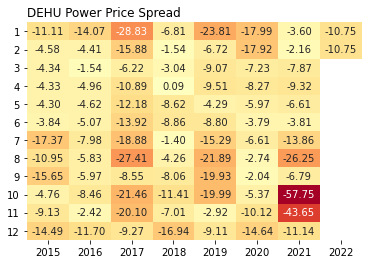

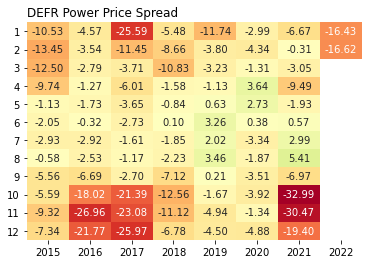

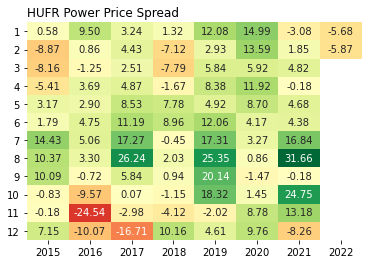

In [14]:
sns.heatmap(dehu_matrix, annot=dehu_matrix, fmt=".2f", cmap="RdYlGn", cbar=False, center=0)
plt.title("DEHU Power Price Spread", loc="left")
plt.yticks(rotation=0)
plt.show()

sns.heatmap(defr_matrix, annot=defr_matrix, fmt=".2f", cmap="RdYlGn", cbar=False, center=0)
plt.title("DEFR Power Price Spread", loc="left")
plt.yticks(rotation=0)
plt.show()

sns.heatmap(hufr_matrix, annot=hufr_matrix, fmt=".2f", cmap="RdYlGn", cbar=False, center=0)
plt.title("HUFR Power Price Spread", loc="left")
plt.yticks(rotation=0)
plt.show()

In [15]:
curve_de.groupby([curve_de.index.month, curve_de.index.year]).mean().unstack().round(2)

,2015,2016,2017,2018,2019,2020,2021,2022
1,31.05,29.03,52.41,29.50,49.41,34.98,52.79,99.04
2,36.69,22.00,39.68,40.12,42.81,21.91,48.71,99.55
3,31.30,24.30,31.69,37.36,30.61,22.52,47.18,88.17
4,29.78,24.21,28.72,31.96,36.97,17.05,53.66,73.51
5,25.33,22.55,30.61,33.66,37.83,17.60,53.33,70.59
6,30.11,27.70,30.00,42.39,32.50,26.23,74.13,NaN
7,34.98,27.18,33.01,49.59,39.71,30.07,81.29,NaN
8,31.61,27.18,30.86,56.22,36.82,34.89,82.81,NaN
9,31.89,30.51,34.30,54.83,35.77,43.68,128.34,NaN
10,39.37,37.14,28.29,53.08,36.95,33.96,139.54,NaN


In [16]:
curve_hu.groupby([curve_hu.index.month, curve_hu.index.year]).mean().unstack().round(2)

,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,42.16,43.09,81.23,36.31,73.23,52.96,56.39,109.79
2,NaN,41.27,26.40,55.56,41.66,49.54,39.84,50.86,110.30
3,NaN,35.64,25.84,37.91,40.40,39.69,29.75,55.05,NaN
4,NaN,34.11,29.17,39.61,31.87,46.48,25.32,62.97,NaN
5,NaN,29.63,27.17,42.79,42.27,42.12,23.57,59.94,NaN
6,NaN,33.95,32.78,43.92,51.26,41.31,30.02,77.94,NaN
7,NaN,52.35,35.16,51.88,50.99,55.00,36.69,95.15,NaN
8,NaN,42.56,33.01,58.27,60.48,58.71,37.63,109.06,NaN
9,NaN,47.53,36.48,42.84,62.90,55.69,45.72,135.13,NaN
10,NaN,44.13,45.60,49.75,64.49,56.94,39.32,197.29,NaN


In [17]:
curve_fr.groupby([curve_fr.index.month, curve_fr.index.year]).mean().unstack().round(2)

,2015,2016,2017,2018,2019,2020,2021,2022
1,41.58,33.59,78.00,34.98,61.15,37.97,59.47,115.47
2,50.14,25.54,51.14,48.78,46.61,26.25,49.01,116.17
3,43.79,27.09,35.40,48.19,33.85,23.83,50.23,NaN
4,39.52,25.48,34.74,33.54,38.10,13.41,63.15,NaN
5,26.46,24.28,34.26,34.50,37.20,14.87,55.26,NaN
6,32.16,28.02,32.74,42.29,29.24,25.85,73.56,NaN
7,37.91,30.10,34.61,51.44,37.69,33.42,78.31,NaN
8,32.19,29.72,32.02,58.45,33.36,36.76,77.40,NaN
9,37.45,37.20,37.00,61.95,35.55,47.19,135.30,NaN
10,44.96,55.17,49.68,65.64,38.62,37.87,172.54,NaN
